## **4.2. Работа с датасетом "house price"**

2.1 Изучите распределение домов от наличия вида на набережную

2.2 Изучите распределение этажей домов

2.3 Изучите распределение состояния домов

- Постройте график
- Сделайте выводы
***

Импортируем нужные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Считаем скаченный файл

In [2]:
df = pd.read_csv("kc-house-data.csv", encoding="cp1251")

In [3]:
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- **`id`** - Уникальный ID для каждого дома
    - `date` - Дата продажи дома
    - `price` - Стоимость продажи дома
    - `bedrooms` - Кол-во спален
    - `bathrooms` - Кол-во ванных комнат (0.5 - туалет без душа)
    - `sqft_living` - Кв. метры жилые
    - `sqft_lot` - Кв. метры общие
    - `floors` - Кол-во этажей
    - `waterfront` - Есть набержная или нет
    - `view` - Значение от 0 до 4 насколько хороший вид
    - `condition` - Значение от 1 до 5 насколько хорошее состояние
    - `grade` - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
    - `sqft_above` - Кв. метры дома, которые находятся выше земли
    - `sqft_basement` - Кв. метры дома, которые находятся ниже земли
    - `yr_built` - Год постройки дома
    - `yr_renovated` - Год ремонта дома
    - `zipcode` - Индекс
    - `lat` - Широтма
    - `long` - Долгота
    - `sqft_living15` - Кв. метры жилой площади у 15 соседей
    - `sqft_lot15` - Кв. метры общей площади у 15 соседей

Посмотрим первичную статистику интересующих нас признаков в этой задаче

In [99]:
df[['waterfront','floors','condition']].describe()

,waterfront,floors,condition
count,21613.00,21613.00,21613.00
mean,0.01,1.49,3.41
std,0.09,0.54,0.65
min,0.00,1.00,1.00
25%,0.00,1.00,3.00
50%,0.00,1.50,3.00
75%,0.00,2.00,4.00
max,1.00,3.50,5.00


### 2.1 Изучите распределение домов от наличия вида на набережную

Проанализируем значения признака

In [5]:
data_waterfront = df['waterfront'].value_counts()
data_waterfront

waterfront
0    21450
1      163
Name: count, dtype: int64

Построим круговую диаграмму с отображением %

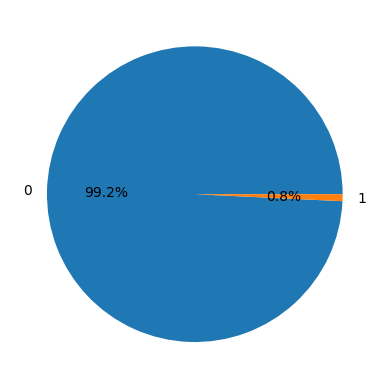

In [6]:
plt.figure()
plt.pie(data_waterfront.values, labels=data_waterfront.index,autopct= '%.1f%%')
plt.show()

### 2.2 Изучите распределение этажей домов

In [7]:
data_floor = df['floors'].value_counts()
data_floor

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

Построим гистограмму по распределению этажности домов

Text(0.5, 1.0, 'Распределение этажей домов')

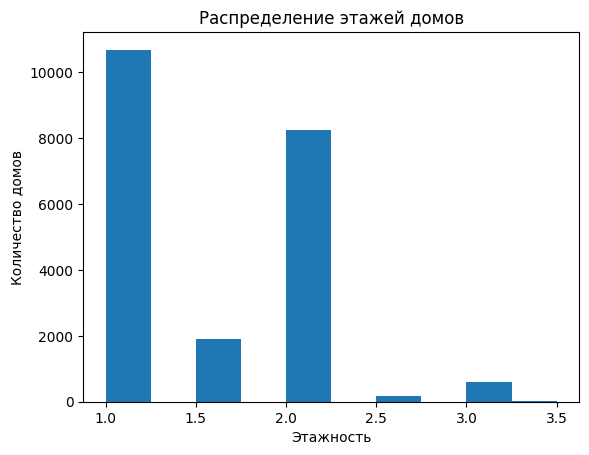

In [8]:
plt.figure()
plt.hist(df["floors"], bins=10)
plt.xlabel("Этажность")
plt.ylabel("Количество домов")
plt.title("Распределение этажей домов")

Построим круговую диаграмму этажности

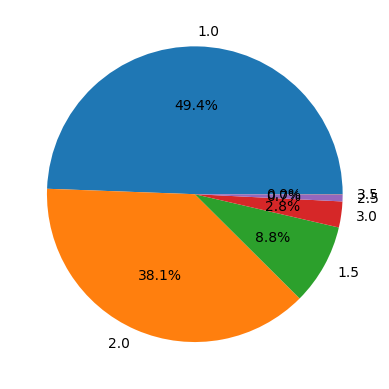

In [9]:
plt.figure()
plt.pie(data_floor.values, labels=data_floor.index,autopct= '%.1f%%')
plt.show()

Построим график с усами распределения этажности в домах

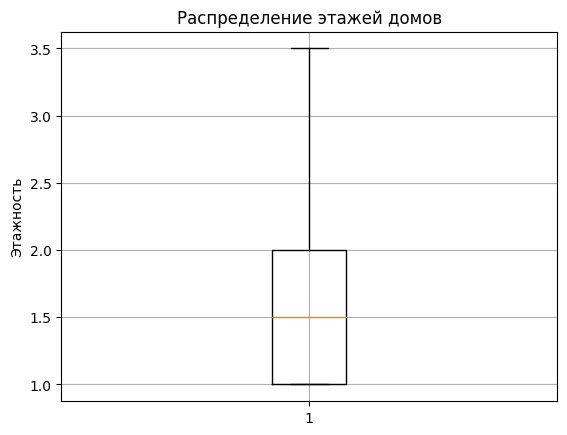

In [10]:
plt.figure()
plt.boxplot(df['floors'])
plt.ylabel('Этажность')
plt.title('Распределение этажей домов')
plt.grid()

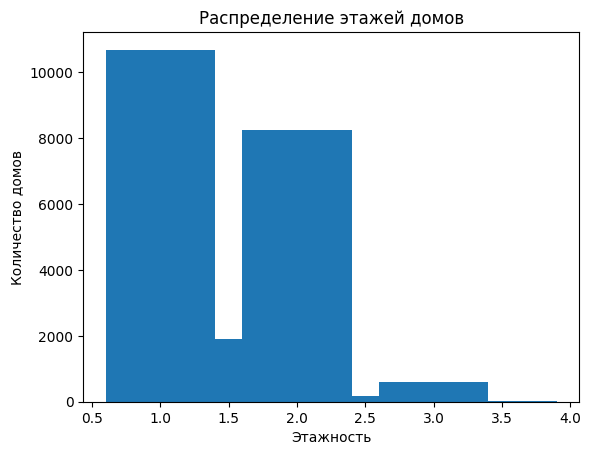

In [11]:
plt.figure()
plt.bar(data_floor.index, data_floor.values)
plt.xlabel('Этажность')
plt.ylabel('Количество домов')
plt.title('Распределение этажей домов');

<Axes: xlabel='floors', ylabel='Count'>

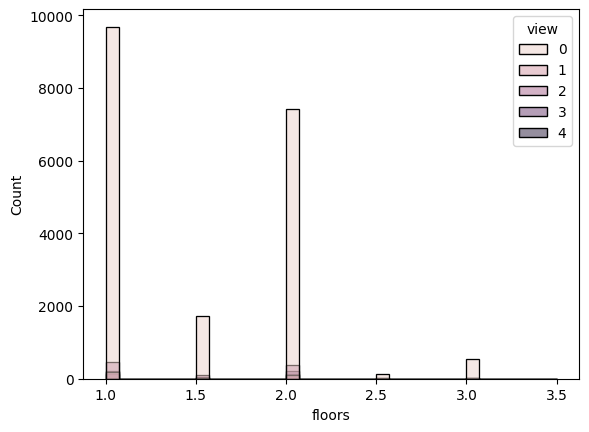

In [12]:
sns.histplot(data=df, x="floors", hue="view")

Построим матрицу корреляции по заданным признакам

In [13]:
corr_matrix = df[['waterfront','floors','condition','view']].corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 2)
corr_matrix = np.abs(corr_matrix)
corr_matrix

,waterfront,floors,condition,view
waterfront,1.00,0.02,0.02,0.40
floors,0.02,1.00,0.26,0.03
condition,0.02,0.26,1.00,0.05
view,0.40,0.03,0.05,1.00


<Axes: >

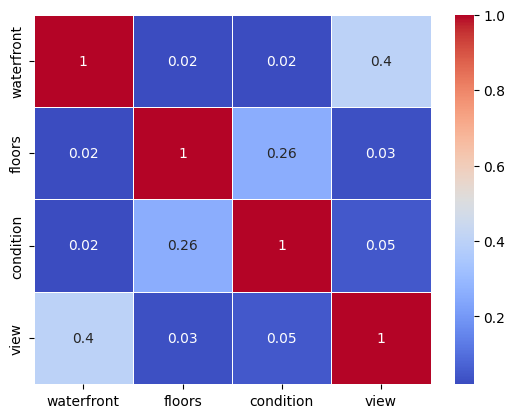

In [14]:
plt.figure()
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='coolwarm')

### 2.3 Изучите распределение состояния домов

Проанализируем значения признака

In [15]:
data_condition = df['condition'].value_counts()
data_condition

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

Построим круговую диаграмму с состоянием домов

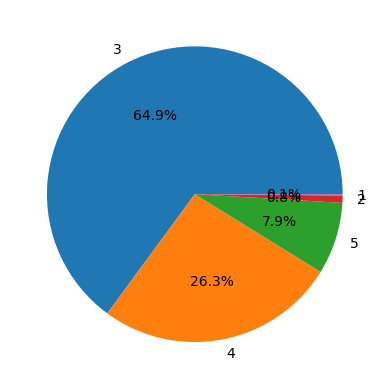

In [17]:
plt.figure()
plt.pie(data_condition.values, labels=data_condition.index,autopct= '%.1f%%')
plt.show()

Создадим столбчатую диаграмму распределения состояния домов.

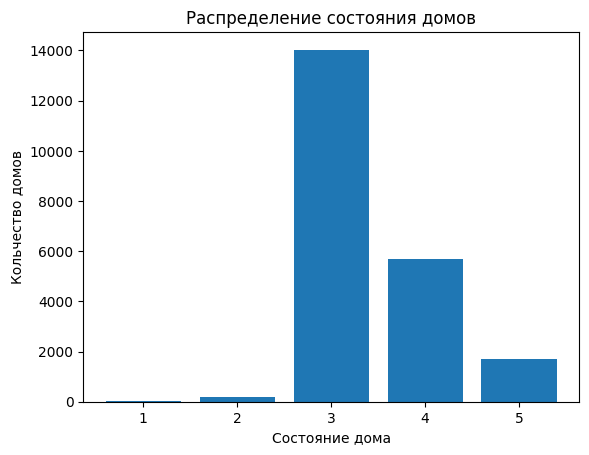

In [18]:
plt.figure()
plt.bar(data_condition.index, data_condition.values)
plt.xlabel('Состояние дома')
plt.ylabel('Кольчество домов')
plt.title('Распределение состояния домов');

### Вывод

<span style="color:#00FFFF">
<i>Сделаем вывод:</i> 
</br>- Домов с наличем вида на набережную только 0,8% 
</br>- Распределение этажей представленных домов приходится по большей части на одно-двух этажные дома. Хороший вид или вид на набережную практически никак не зависят от этажности дома. Большую роль этажность оказывает на состояние дома
</br>- У большинства домов, состояние выше среднего.
</span>